In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestClassifier
import pprint
import tensorflow as tf
from tensorflow.keras.layers import Dense, Input, GlobalMaxPooling1D, LSTM, GRU
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import ModelCheckpoint

np.random.seed(0)
tf.random.set_seed(0)

In [2]:
df = pd.read_csv('../DataSamples/daod_mc16_13TeV_sequences.csv')

In [3]:
df = df.reindex(np.random.permutation(df.index))

In [4]:
df['n_tasks'] = df['n_tasks'].apply(lambda x: [int(item) for item in x[1:-1].split(',')])

In [5]:
initlal_sequences = list(df['n_tasks'].values)

In [6]:
N = 30

In [41]:
new_sequences = []
next = []
for sequence in initlal_sequences:
    number_of_accesses = sum(sequence)
    # skip not popular datasets
    if number_of_accesses > 30:
        # find first element > 0 in the sequence
        new_index = [index for index,item in enumerate(sequence) if item>0][0]
        if len(sequence[new_index:]) > N+1:
            new_sequence = sequence[new_index:new_index+N]
            new_sequences.append(new_sequence)
            next.append(sequence[new_index+N])

In [37]:
new_sequences[1][0:10]

[7, 2, 2, 0, 8, 0, 8, 1, 3, 19]

In [40]:
new_sequences[1][10]

0

In [42]:
new_sequences = np.array(new_sequences)

In [43]:
print(new_sequences)

[[1 0 4 ... 2 2 1]
 [7 2 2 ... 0 0 0]
 [4 1 8 ... 0 0 0]
 ...
 [2 5 4 ... 1 4 0]
 [1 0 0 ... 1 3 2]
 [1 1 0 ... 0 0 1]]


In [44]:
Y = np.array(next)

In [45]:
n_features = 1
X = new_sequences.reshape((new_sequences.shape[0], new_sequences.shape[1], n_features))
print(X[:2])

[[[ 1]
  [ 0]
  [ 4]
  [ 1]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 1]
  [ 2]
  [ 2]
  [ 1]
  [ 0]
  [ 1]
  [ 1]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 3]
  [ 2]
  [ 0]
  [ 0]
  [ 0]
  [ 7]
  [ 0]
  [ 0]
  [ 2]
  [ 2]
  [ 1]]

 [[ 7]
  [ 2]
  [ 2]
  [ 0]
  [ 8]
  [ 0]
  [ 8]
  [ 1]
  [ 3]
  [19]
  [ 0]
  [ 1]
  [ 0]
  [ 1]
  [ 2]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]
  [ 0]]]


In [46]:
X.shape

(9881, 30, 1)

In [47]:
Ntest = 1000
Xtrain = X[:-Ntest]
Xtest = X[-Ntest:]
Ytrain = Y[:-Ntest]
Ytest = Y[-Ntest:]

In [73]:
Ytest

array([ 0,  0,  3,  0,  0,  6,  4,  0,  1,  3,  0,  2,  0,  2,  1,  0,  0,
        0,  3,  7,  1,  2,  1,  1,  0,  0,  1,  1,  0,  2,  2,  1,  1,  3,
        1,  2,  0,  0,  0,  0,  4,  0,  1,  0,  0,  3,  2,  0,  0,  0,  0,
        1,  0,  2,  0,  2,  1,  0,  2,  0,  2,  0,  3,  0,  0,  0,  0,  2,
        0,  1,  0,  2,  2,  0,  5,  0,  0,  1,  0,  0,  1,  1,  0,  1,  0,
        0,  0,  2,  0,  0,  0,  2,  0,  0,  0,  0,  1,  1,  0,  4,  1,  0,
        0,  2,  0,  0,  0,  0,  5,  0,  0,  2,  0,  2,  1,  1,  0,  2,  0,
        2,  2,  0,  0,  2,  1,  2,  5,  0,  0,  0,  3,  5,  0,  0,  0,  1,
        0,  1,  0,  1,  6,  0,  2,  0,  0,  0,  0,  2,  2,  4,  0,  0,  3,
        0,  0,  1,  0,  1,  0,  0,  0,  2,  0,  0,  0,  0,  1,  1,  3,  0,
        0,  0,  2,  3,  0,  3,  1,  0,  0,  0,  0,  2,  1,  1,  0,  0,  0,
        5,  1,  1,  0,  0,  4,  3,  0,  2,  3,  0,  3, 21,  1,  0,  1,  2,
        8,  2,  0,  0,  2,  0,  5,  0,  2,  0,  4,  2,  0,  1,  0,  0,  0,
        0,  0,  1,  0,  0

In [49]:
T = N
D = 1
K = 2

In [61]:
# RNN
i = Input(shape=(T,1))
x = LSTM(24)(i)
x = Dense(1, activation='relu')(x)
model = Model(i, x)

In [62]:
# i = Input(shape=(30,1))
# x = LSTM(32, return_sequences=True)(i)
# x = GlobalMaxPooling1D()(x)
# x = Dense(2)(x)
# model = Model(i,x)

In [63]:
model.summary()

Model: "model_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_3 (InputLayer)        [(None, 30, 1)]           0         
                                                                 
 lstm_2 (LSTM)               (None, 24)                2496      
                                                                 
 dense_2 (Dense)             (None, 1)                 25        
                                                                 
Total params: 2,521
Trainable params: 2,521
Non-trainable params: 0
_________________________________________________________________


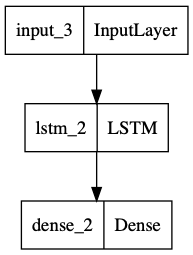

In [64]:
tf.keras.utils.plot_model(model)

In [65]:
check_point = ModelCheckpoint(
    'best_model.h5', monitor='val_loss', save_best_only=True
)

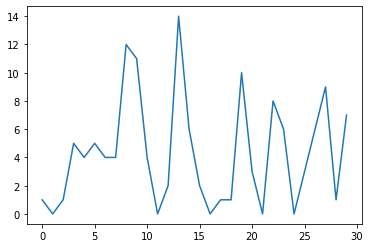

In [66]:
plt.plot(Xtrain[2000, :, :]);

In [67]:
model.compile(
    loss='mse',
    optimizer='adam'
)

In [68]:
r = model.fit(
    Xtrain,
    Ytrain,
    epochs=100,
    validation_data=(Xtest, Ytest)
)

Epoch 1/100
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
274/278 [============================>.] - ETA: 0s - loss: 2.5776WARNING:tensorflow:AutoGraph could not transform <function Model.make_test_function.<locals>.test_function at 0x7f9310ad0170> and will run it as-is.
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full 

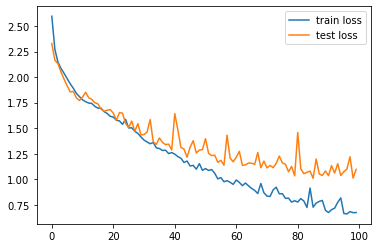

In [69]:
plt.plot(r.history['loss'], label='train loss')
plt.plot(r.history['val_loss'], label='test loss')
plt.legend();

In [70]:
Ptrain = model.predict(Xtrain).flatten()
Ptest = model.predict(Xtest).flatten()

Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
Please report this to the TensorFlow team. When filing the bug, set the verbosity to 10 (on Linux, `export AUTOGRAPH_VERBOSITY=10`) and attach the full output.
Cause: 'arguments' object has no attribute 'posonlyargs'
To silence this warning, decorate the function with @tf.autograph.experimental.do_not_convert
32/32 [==============================] - 0s 2ms/step


In [82]:
list(Ptest)

[0.41128513,
 0.9820434,
 4.1487694,
 0.0,
 0.41627017,
 0.55986834,
 1.7771063,
 0.5180739,
 1.0484685,
 2.1945288,
 0.0,
 1.8510929,
 0.013384998,
 1.3655797,
 1.5603728,
 0.0,
 0.2920711,
 0.0,
 0.8361604,
 3.6716373,
 0.9655818,
 1.9970686,
 1.3456312,
 1.8588998,
 0.0,
 0.0,
 0.36618736,
 1.1244619,
 0.03469655,
 1.9156306,
 1.995019,
 2.5524964,
 0.0,
 2.7254894,
 0.98010075,
 1.774149,
 0.0,
 0.0,
 0.0,
 0.0,
 3.961397,
 0.0,
 2.6237457,
 0.0,
 0.0,
 3.5201476,
 1.9698853,
 0.10691917,
 0.0,
 0.44961622,
 0.0,
 0.25099188,
 1.994135,
 2.2369359,
 0.0,
 1.4335372,
 1.1781152,
 4.999497,
 2.091397,
 0.0,
 0.73562396,
 0.0,
 3.8342745,
 0.0,
 0.0,
 0.0,
 0.0,
 1.9439642,
 0.0,
 1.2022011,
 0.0,
 2.1208293,
 3.717127,
 0.0,
 4.7461023,
 0.0,
 0.0,
 1.6802516,
 0.1536285,
 0.04616916,
 1.0740795,
 1.2222474,
 0.0,
 0.3404431,
 0.0,
 0.0,
 0.0,
 1.9310267,
 0.0,
 0.0,
 0.0,
 1.934354,
 0.0,
 0.40793386,
 0.0,
 0.33977786,
 0.8414718,
 0.99083793,
 0.0,
 3.1673965,
 0.44886133,
 0.4361

In [83]:
Ptest_rounded = [1 if i>0 else 0 for i in list(np.round(Ptest))]

In [84]:
Ytest_rounded = [1 if i>0 else 0 for i in Ytest]

In [85]:
Ptest_rounded

[0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 1,
 1,
 0,
 0,


In [87]:
df_results = pd.DataFrame({'Y': Ytest_rounded, 'Ypred': Ptest_rounded})

In [90]:
df_results

,Y,Ypred
0,0,0
1,0,1
2,1,1
3,0,0
4,0,0
...,...,...
995,1,1
996,1,1
997,1,1
998,1,1


In [93]:
# Print results:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f'Accuracy: {accuracy_score(Ytest_rounded, Ptest_rounded)}')
print('Confusion Matrix')
print(confusion_matrix(Ytest_rounded, Ptest_rounded))
print('Classification Report')
print(classification_report(Ytest_rounded, Ptest_rounded))

Accuracy: 0.86
Confusion Matrix
[[470  85]
 [ 55 390]]
Classification Report
              precision    recall  f1-score   support

           0       0.90      0.85      0.87       555
           1       0.82      0.88      0.85       445

    accuracy                           0.86      1000
   macro avg       0.86      0.86      0.86      1000
weighted avg       0.86      0.86      0.86      1000



In [96]:
# sequences for evaluation (from the third not 0 element)
eval_sequences = []
eval_labels = []
for sequence in initlal_sequences:
    number_of_accesses = sum(sequence)
    # skip not popular datasets
    if number_of_accesses > 30:
        try:
            new_index = [index for index,item in enumerate(sequence) if item > 0][1]
            if len(sequence[new_index:]) > N+1:
                new_sequence = sequence[new_index:new_index+N]
                eval_sequences.append(new_sequence)
                eval_labels.append(1 if sequence[new_index+N]>0 else 0)
        except:
            continue

In [97]:
eval_sequences = np.array(eval_sequences)
eval_sequences = eval_sequences.reshape((eval_sequences.shape[0], eval_sequences.shape[1], 1))

In [98]:
eval_sequences

array([[[4],
        [1],
        [0],
        ...,
        [1],
        [1],
        [0]],

       [[2],
        [2],
        [0],
        ...,
        [0],
        [0],
        [0]],

       [[1],
        [8],
        [0],
        ...,
        [0],
        [0],
        [0]],

       ...,

       [[5],
        [4],
        [1],
        ...,
        [4],
        [0],
        [2]],

       [[2],
        [1],
        [0],
        ...,
        [4],
        [0],
        [4]],

       [[1],
        [0],
        [0],
        ...,
        [0],
        [1],
        [0]]])

In [103]:
eval_labels = np.array(eval_labels)
eval_labels = [1 if i>0 else 0 for i in eval_labels]

In [99]:
pred_y_eval = model.predict(eval_sequences).flatten()

309/309 [==============================] - 1s 3ms/step


In [101]:
# evaluate
pred_rounded = [1 if i>0 else 0 for i in list(np.round(pred_y_eval))]

In [104]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
print(f'Accuracy: {accuracy_score(eval_labels, pred_rounded)}')
print('Confusion Matrix')
print(confusion_matrix(eval_labels, pred_rounded))
print('Classification Report')
print(classification_report(eval_labels, pred_rounded))

Accuracy: 0.7241169922072664
Confusion Matrix
[[4023 1573]
 [1153 3132]]
Classification Report
              precision    recall  f1-score   support

           0       0.78      0.72      0.75      5596
           1       0.67      0.73      0.70      4285

    accuracy                           0.72      9881
   macro avg       0.72      0.72      0.72      9881
weighted avg       0.73      0.72      0.73      9881

